# Data loader demo

In [1]:
import task3.utils.config
import task3.utils.utils
import task3.utils.img_utils
import importlib
import sys

## Initialize setup and get the data loader

In [2]:
importlib.reload(sys.modules['task3.utils.config'])
importlib.reload(sys.modules['task3.utils.utils'])
from task3.utils.config import get_data_loader, init

cfg = init(config='configs/default.yaml')

# you'd probably call this in train.py
training_loader, validation_loader, test_loader = get_data_loader(cfg, mode='train', get_subset=False)
submission_loader = get_data_loader(cfg, mode='submission', get_subset=False)

dict_keys(['name', 'video', 'box', 'label', 'frames', 'dataset'])
2021-12-28T18:24:48.089471+0100 DEBUG Loaded samples: ['11NZLRCO13', 'QZA3WA0E2X', 'R82Q2AL9P7', '1XHV0Q88M5', 'E9AHVWGBUF', 'WO0OOZLXP6', 'ZMJIDN442P', 'OYZFKJR8U3', '3DGDHONGJW', 'YEZ7BPLZW0', 'W00G0Q112W', 'JANFS05F33', 'ONA22CCCFQ', 'EH667Z5JMT', '55M79ZANVX', 'H7G0BX4HFV', '571G03ZYDA', 'MHD497XXNA', 'TFDB2R0ZSA']
2021-12-28T18:24:48.155931+0100 DEBUG Exclude samples: None, include samples: None, applied transforms: Compose(
    ToTensor()
)
2021-12-28T18:24:48.156601+0100 DEBUG Dataset creation: train
2021-12-28T18:24:48.157044+0100 DEBUG Dataset creation: validation
2021-12-28T18:24:48.157345+0100 DEBUG Dataset creation: test
dict_keys(['name', 'video'])
2021-12-28T18:24:53.081388+0100 DEBUG Loaded samples: ['RZ9W7OK2EO', '401JD35E1A', 'O7WUJ71C15', '7UXIXUBK2G', 'JQX264DTZ0', 'NHC30J31YN', 'CD4RIAOCHG', 'QJTAVYCG6M', '3WOQKZBVRN', 'UB7LFQKZT5', 'SZKYOVQ4ZP', 'ESY800XYMN', '1QSFD8ORNM', '0MVRNDWR1G', 'VODEK84RH4',

## Visualize data

In [3]:
# Get and visualize a batch of training data
train_batch = next(iter(training_loader))
val_batch = next(iter(validation_loader))
test_batch = next(iter(test_loader)) if test_loader is not None else None
submission_batch = next(iter(submission_loader))

batches = {
    'train': train_batch,
    'val': val_batch,
    'test': test_batch,
    'submission': submission_batch,
}

2021-12-28T18:25:23.493098+0100 DEBUG torch.Size([8, 1, 30, 40])
2021-12-28T18:25:23.494540+0100 DEBUG (30, 40)


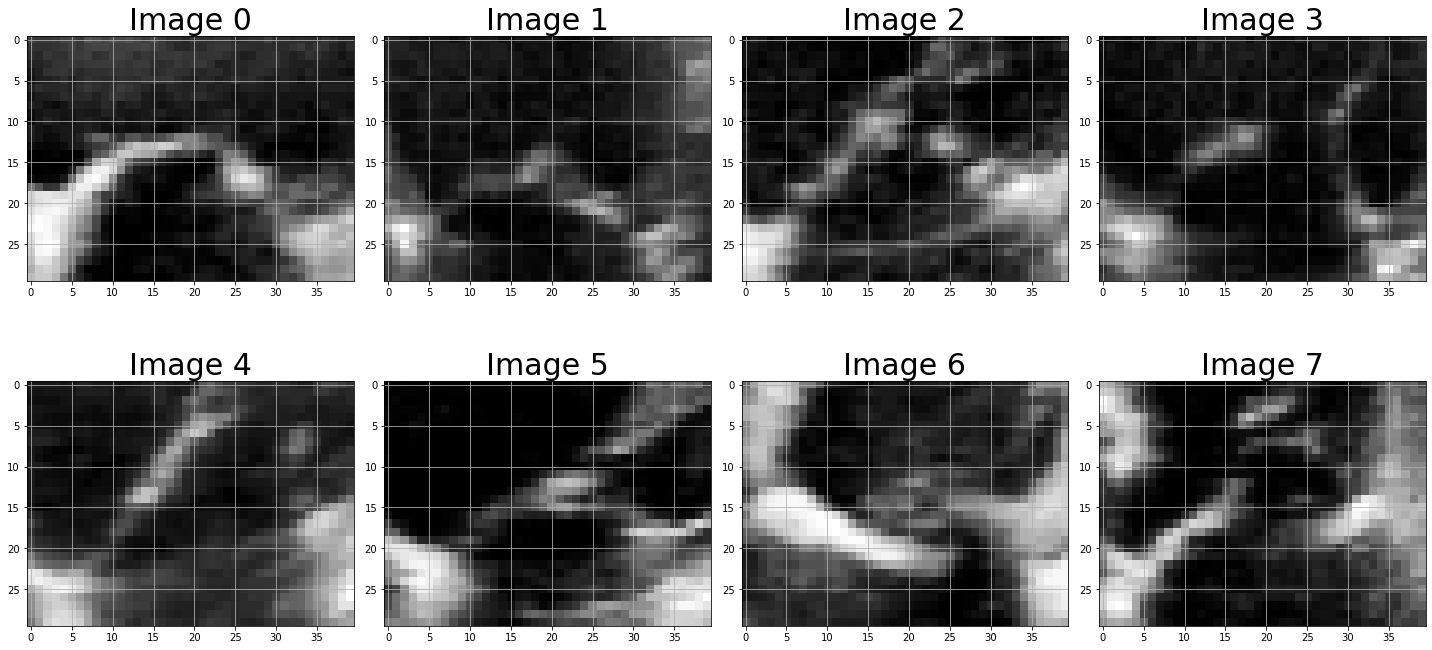

2021-12-28T18:25:24.197227+0100 DEBUG torch.Size([8, 1, 30, 40])
2021-12-28T18:25:24.198852+0100 DEBUG (30, 40)


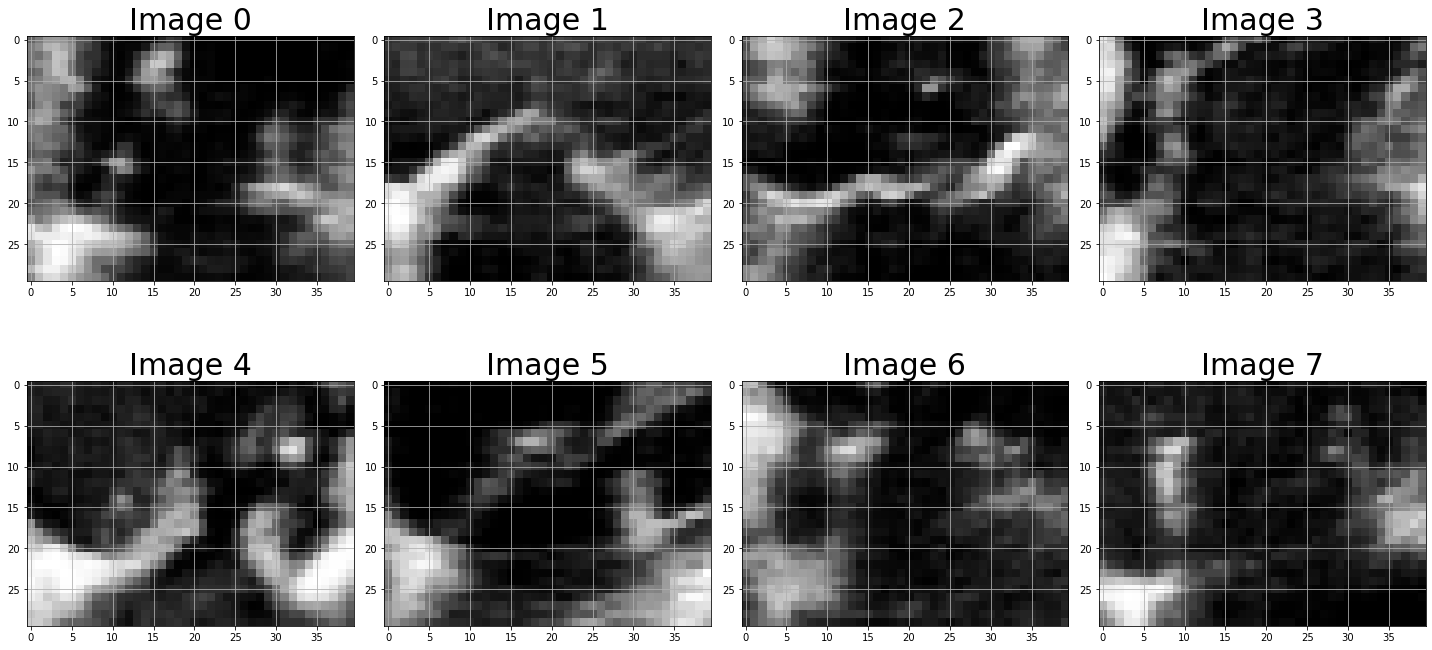

2021-12-28T18:25:24.689642+0100 WARNING Could not visualize batch: No batch dict provided.
2021-12-28T18:25:24.690007+0100 DEBUG torch.Size([1, 1, 30, 40])
2021-12-28T18:25:24.690326+0100 DEBUG (30, 40)


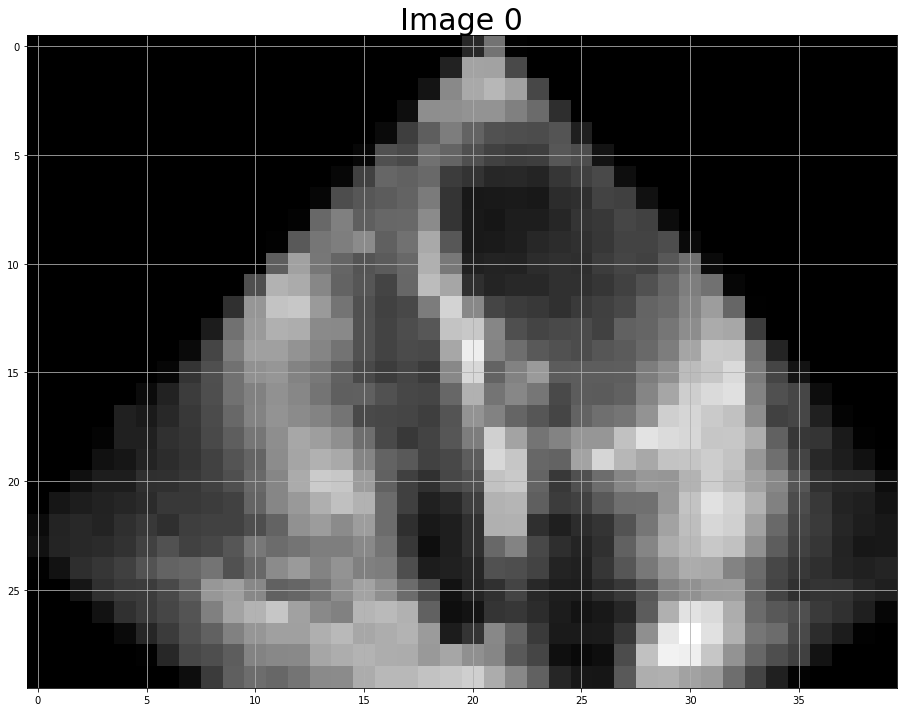

In [4]:
importlib.reload(sys.modules['task3.utils.img_utils'])
from task3.utils.img_utils import show_img_batch

for name, batch in batches.items():
    show_img_batch(batch)